# Trabajo Práctico N°1 Aprendizaje Automático 1#
## Integrantes ##
1. López Ceratto, Julieta : L-3311/1
2. Rodríguez Griñó, Tomás : R-4643/4
3. Slepoy, David: S-5782/7

Importamos librerías necesarias.  

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

Cargamos el dataset house-prices-tp.csv 

In [2]:
df = pd.read_csv('src\house-prices-tp.csv', sep = ',')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.071510,0.000000,4.490000,0.0,0.449,6.121000,56.8,3.747600,3.000000,247.000000,18.500000,395.150000,8.440000,22.200000
1,0.082650,0.000000,13.920000,0.0,0.437,6.127000,18.4,5.502700,4.000000,289.000000,16.000000,396.900000,8.580000,23.900000
2,0.128160,12.500000,6.070000,0.0,0.409,5.885000,33.0,6.498000,4.000000,345.000000,18.900000,396.900000,8.790000,20.900000
3,0.088730,21.000000,5.640000,0.0,0.439,5.963000,45.7,6.814700,4.000000,243.000000,16.800000,395.560000,13.450000,19.700000
4,0.114320,0.000000,8.560000,0.0,0.520,6.781000,71.3,2.856100,5.000000,384.000000,20.900000,395.580000,7.670000,26.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.082440,30.000000,4.930000,0.0,0.428,6.481000,18.5,6.189900,6.000000,300.000000,16.600000,379.410000,6.360000,23.700000
552,0.475470,0.000000,9.900000,0.0,0.544,6.113000,58.8,4.001900,4.000000,304.000000,18.400000,396.230000,12.730000,21.000000
553,0.249800,0.000000,21.890000,0.0,0.624,5.857000,98.2,1.668600,4.000000,437.000000,21.200000,392.040000,21.320000,13.300000
554,32.504013,6.528591,8.937346,1.0,NaN,4.016588,NaN,5.243777,20.416908,197.236588,19.639059,6.267059,7.033962,23.028798


1) CRIM: tasa de criminalidad per cápita por ciudad
2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
3) INDUS: proporción de acres de negocios no minoristas por ciudad
4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
6) RM: número promedio de habitaciones por vivienda
7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8) DIS: distancias ponderadas a cinco centros de empleo de Boston
9) RAD: índice de accesibilidad a las autopistas radiales
10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
11) PTRATIO: proporción alumno-maestro por ciudad
12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
13) LSTAT: % de población de menor estatus socioeconómico

Variable de salida (target):

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


# Análisis descriptivo #

En este apartado se realiza un análisis descriptivo de cada variable.

Primero se divide el dataset en conjuntos de training, validación y test.

In [4]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [5]:
# Paso 1: Dividir en train+val y test (20% para test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Dividir train+val en train y validation (30% de train+val para validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

## 1. Análisis, visualización de variables y decisión sobre datos faltantes. ##

## 1. Datos Faltantes ##

In [6]:
#Miramos que columnas tienen datos faltantes
X_train.isnull().sum()

CRIM       12
ZN         14
INDUS       8
CHAS       13
NOX        15
RM         11
AGE        14
DIS        11
RAD        19
TAX         9
PTRATIO    14
B          13
LSTAT      13
dtype: int64

Se puede observar que todas las columnas tienen datos faltantes.

Eliminamos las filas que contengan 7 valores nulos o más ya que consideramos que no aportan gran cantidad de detalles para la prediccion.

In [7]:
X_train.dropna(thresh=7, inplace=True)

Chequeamos que no haya filas duplicadas antes de proceder a la imputación de datos faltantes.

In [8]:
X_train.duplicated().sum()

np.int64(0)

Una vez que nos sercioramos que no haya filas duplicadas, procedemos a realizar la imputación de datos faltantes.

### Imputación de datos faltantes por K-N Vecinos más cercanos (KNN) ###

In [9]:
##Elegimos 5 vecinos más cercanos
imputer = KNNImputer(n_neighbors=5) 
X_train = imputer.fit_transform(X_train)

In [10]:
df_X_train = pd.DataFrame(X_train, columns=list(X.columns))

In [11]:
df_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
1,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4.0,270.0,18.2,396.33,6.21
2,0.08199,0.0,13.92,0.0,0.437,6.009,42.3,5.5027,4.0,289.0,16.0,396.90,10.40
3,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53
4,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
295,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
296,0.19657,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15
297,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74


In [12]:
df_X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [28]:
X_train['CHAS'] = X_train['CHAS'].round()

KeyError: 'CHAS'

### 2. Análisis descriptivo ###

In [27]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,298.000000,296.000000,302.000000,297.000000,295.000000,299.000000,296.000000,299.000000,291.000000,301.000000,296.000000,297.000000,297.000000
mean,6.264386,13.317242,11.177869,0.077441,0.569540,6.260851,68.673160,3.909085,9.933071,416.444125,18.457794,343.375511,13.177558
std,14.036760,24.787915,6.761233,0.267741,0.125471,0.786317,28.824607,2.273461,8.772745,167.464484,2.251720,103.653215,7.771384
min,0.006320,0.000000,1.040709,0.000000,0.394000,3.561000,2.900000,1.169100,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.080573,0.000000,5.130000,0.000000,0.460000,5.887500,42.226274,2.101800,4.000000,281.215205,16.900000,364.610000,7.340000
50%,0.359170,0.000000,9.900000,0.000000,0.538000,6.195000,77.900000,3.262800,5.000000,384.000000,19.100000,390.390000,11.100000
75%,5.686307,20.000000,18.100000,0.000000,0.657221,6.653000,94.700000,5.344000,24.000000,666.000000,20.200000,395.990000,17.280000
max,88.924127,100.000000,27.740000,1.000000,0.871000,8.748910,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


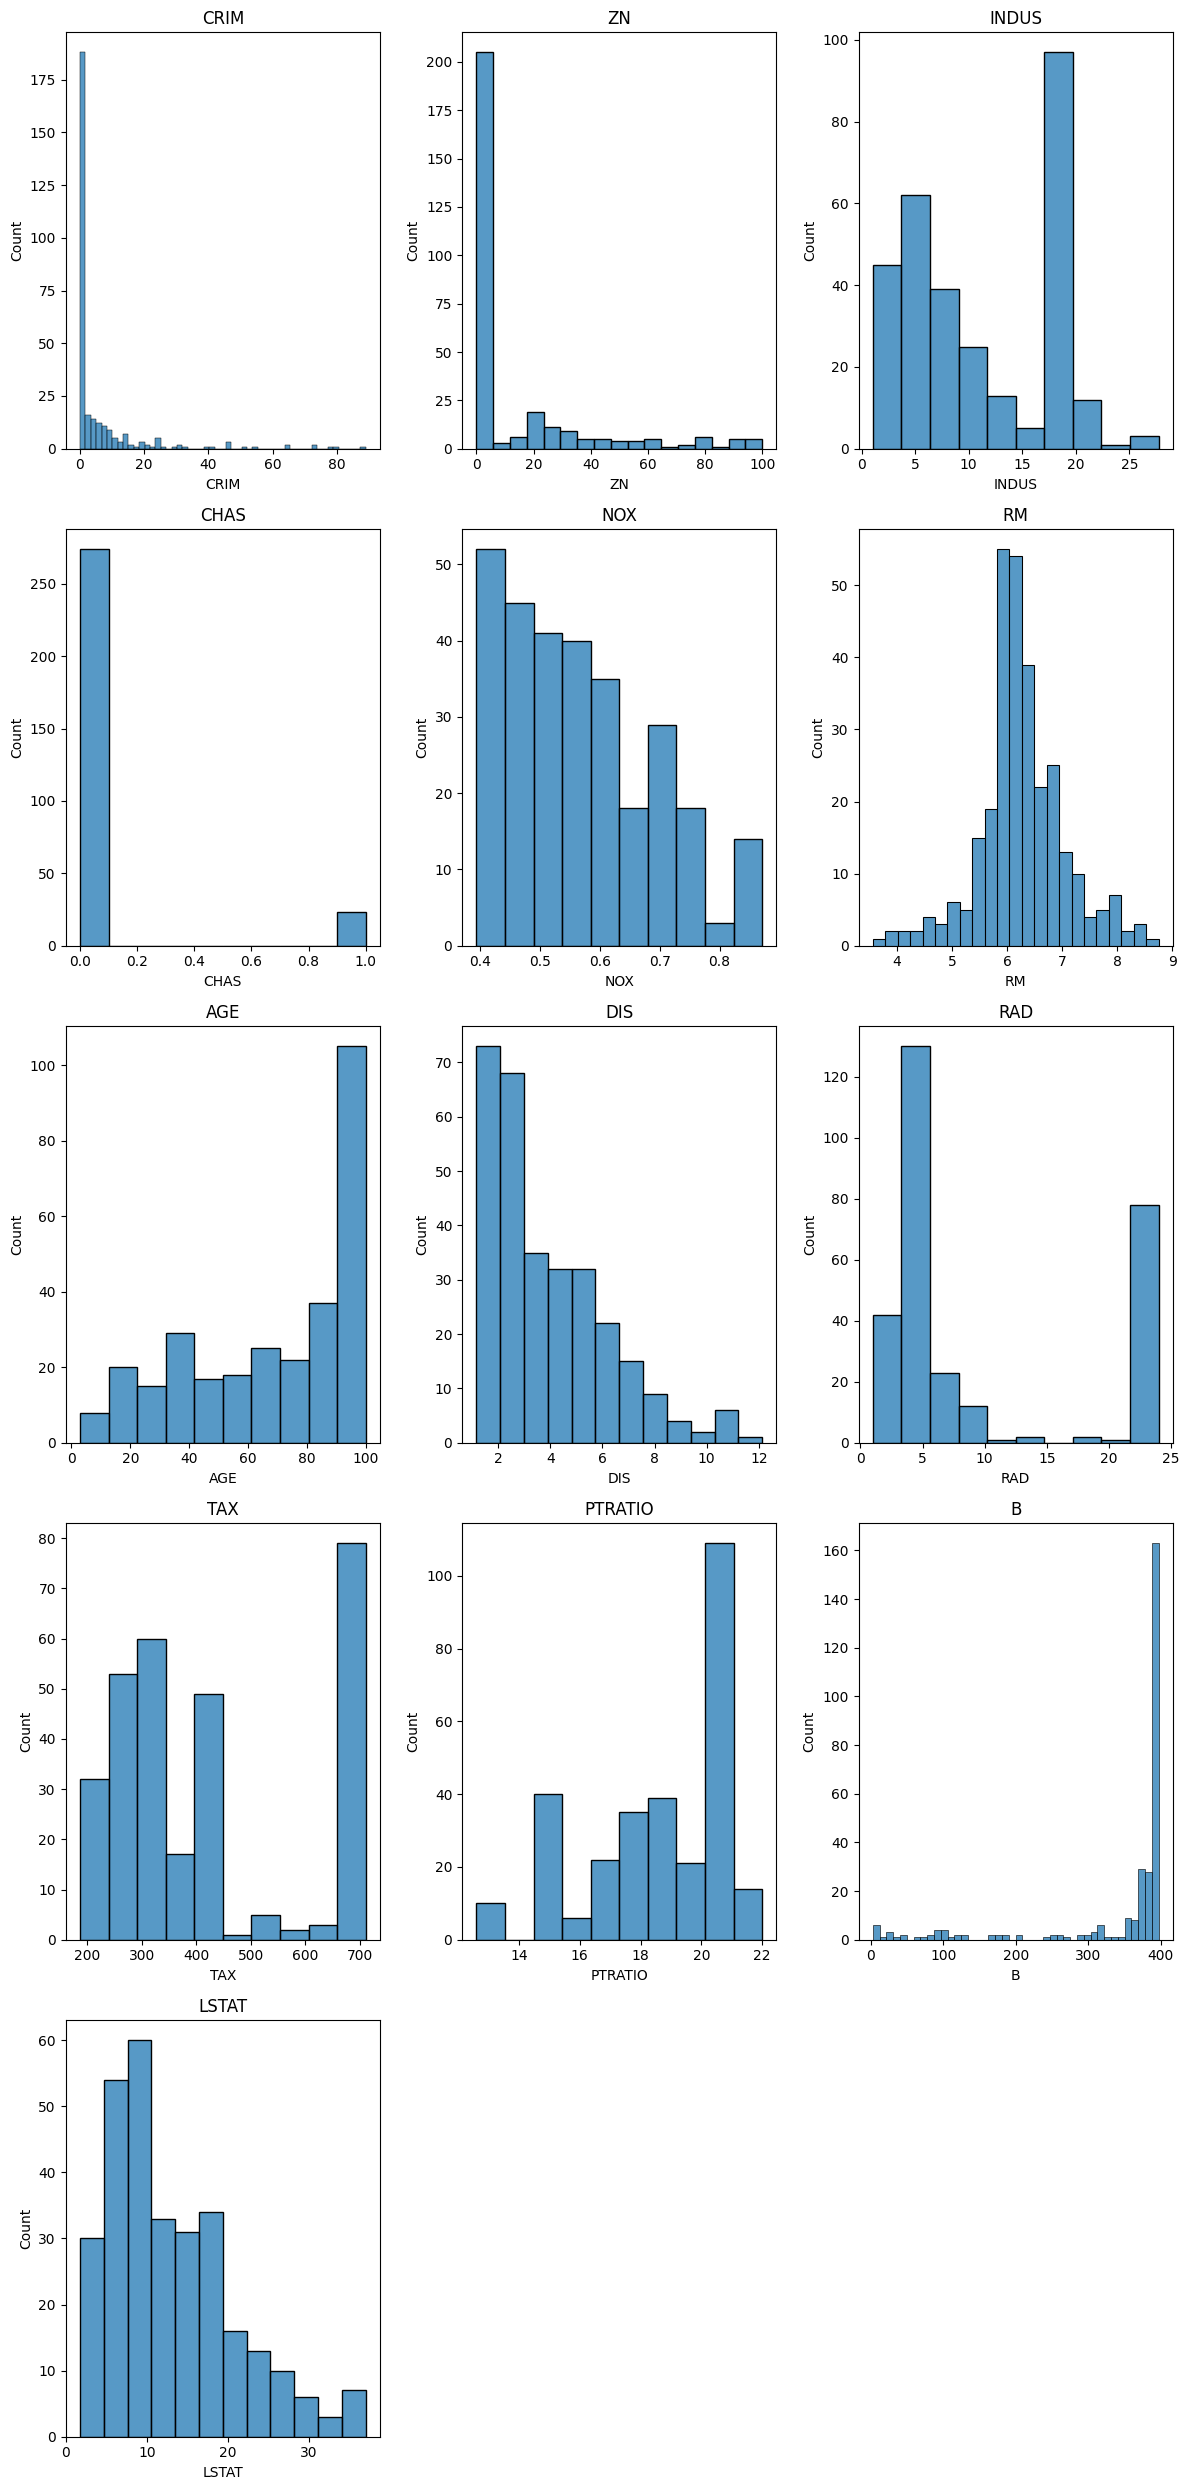

In [32]:
def hist_plot(df):
    l = len(df.columns)
    # Determina el número de filas
    rows = (l + 2) // 3
    cols = 3  # Tres columnas por fila
    
    # Crear los subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axes = axes.flatten()  # Aplana los ejes para fácil indexación
    
    # Graficar cada columna en su respectivo subplot
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col)
    
    # Eliminar subplots vacíos si el número de columnas no es múltiplo de 3
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


hist_plot(X_train)
    

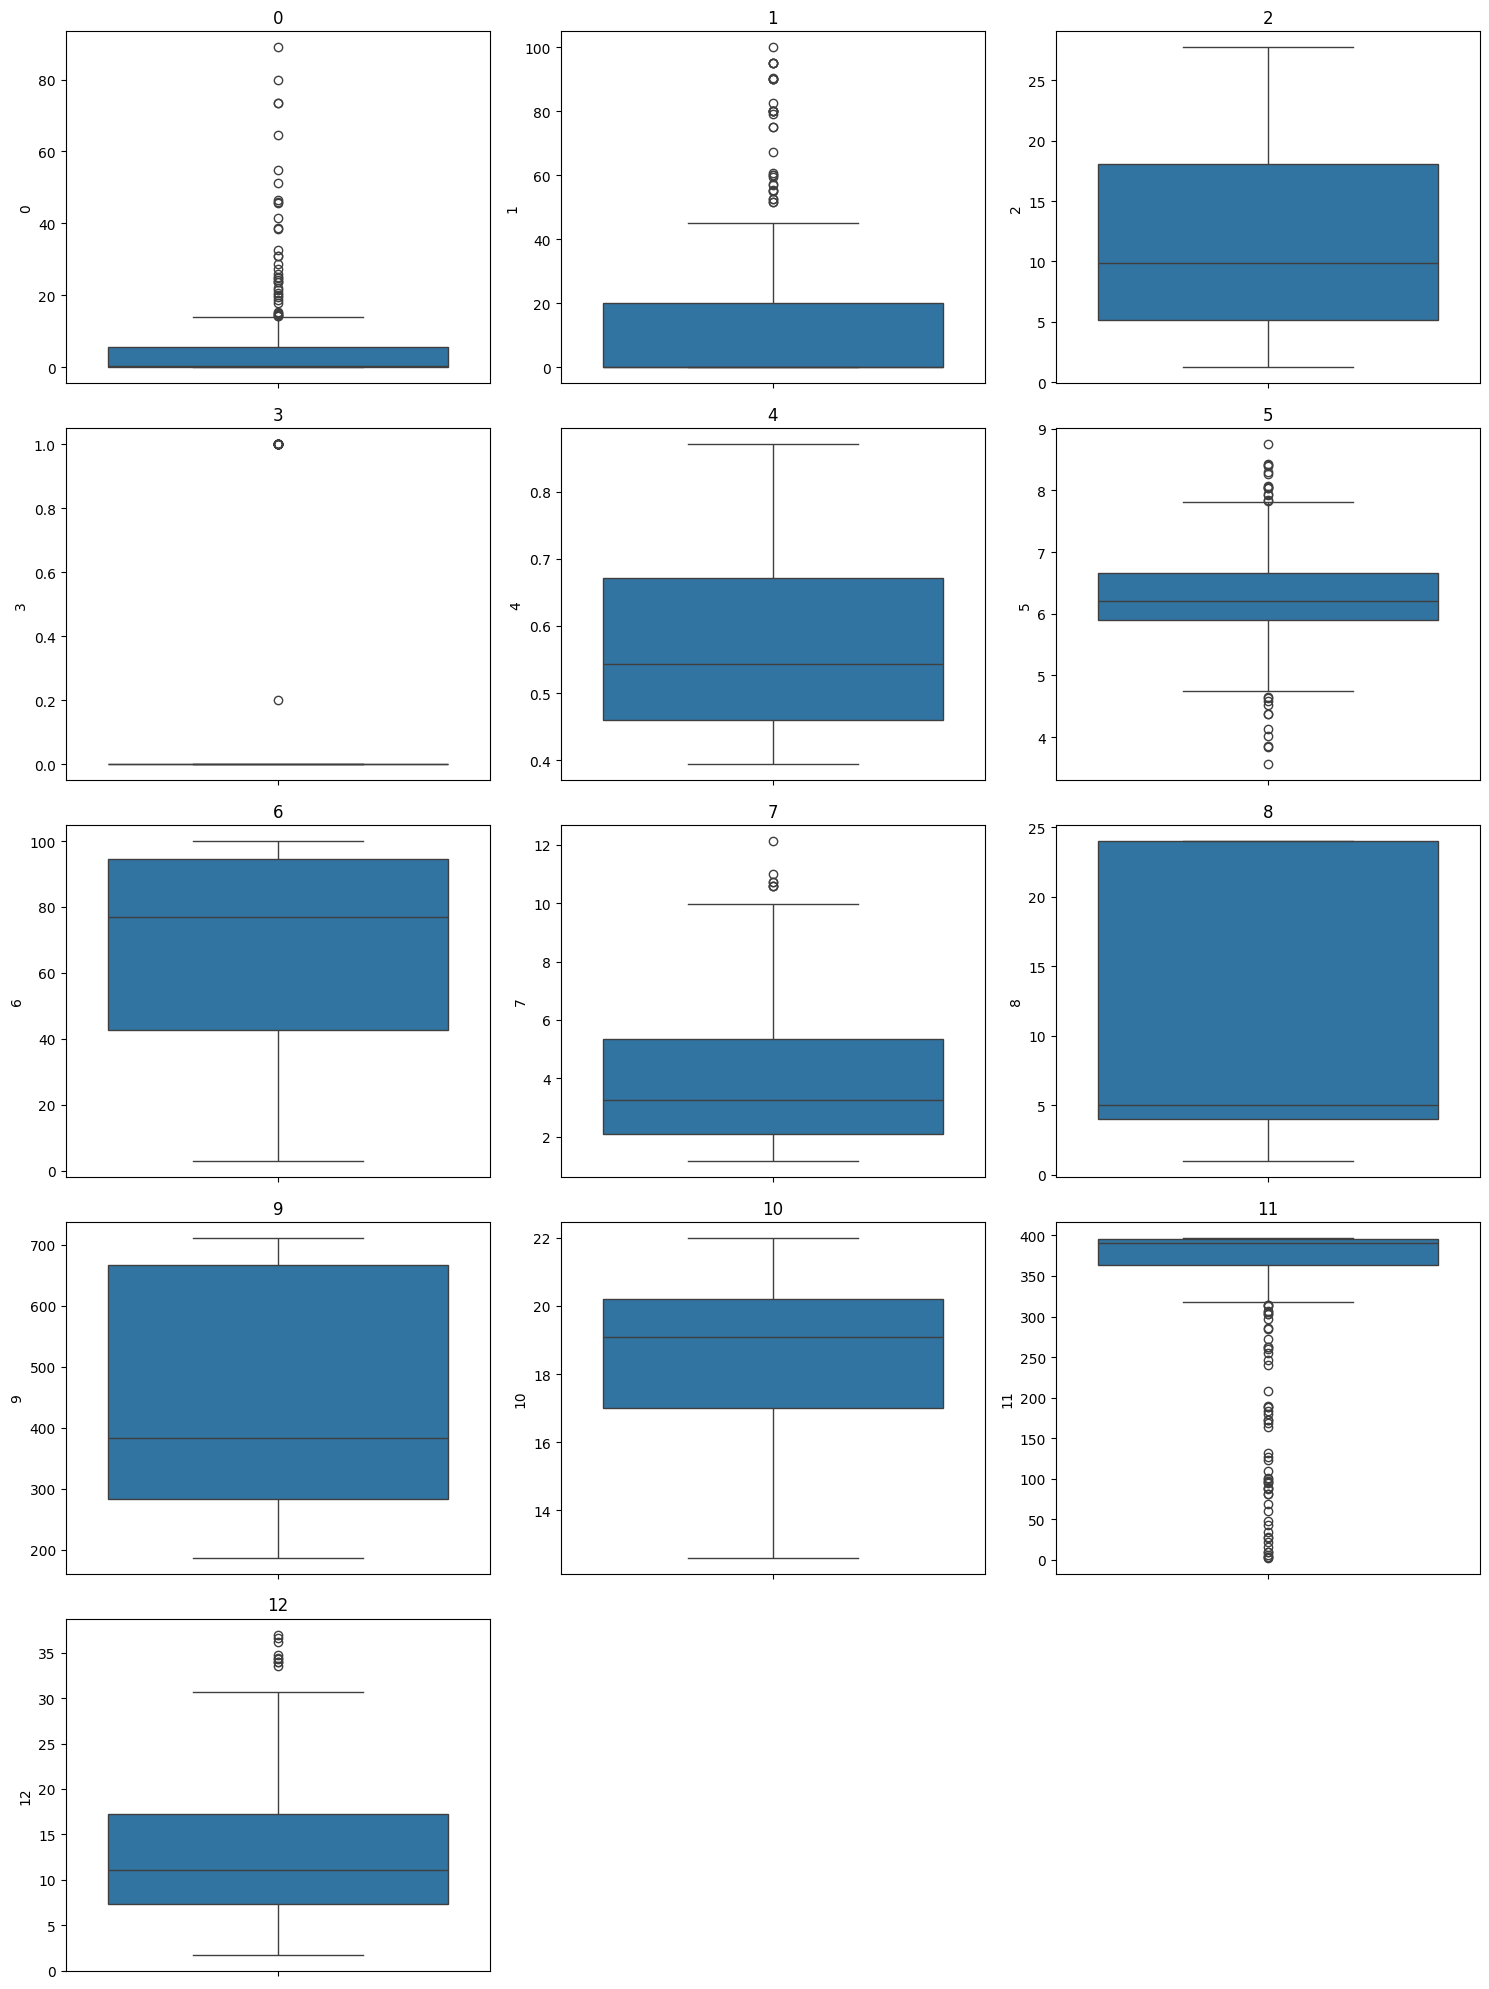

In [25]:
def boxplot(df):
    l = len(df.columns)
    # Determina el número de filas
    rows = (l + 2) // 3
    cols = 3  # Tres columnas por fila
    
    # Crear los subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    axes = axes.flatten()  # Aplana los ejes para fácil indexación
    
    # Graficar cada columna en su respectivo subplot
    for i, col in enumerate(df.columns):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_title(str(col), fontsize=12)
    
    # Eliminar subplots vacíos si el número de columnas no es múltiplo de 3
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


boxplot(X_train)

#### Descripción de variables:
1. En la variable CRIM al ser la tasa de criminalidad per cápita por ciudad. Podemos observar que es una variable cuantitativa, continua. Podemos observar que tiene una distribución unimodal, sesgada a la derecha con una moda con valores cercanos a cero. Gracias al boxplor podemos obsercar que posee valores atipicos aproximadamente en los valores mayores a 16.

2. En la variable ZN al ser proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados podemos observar que es una variable cuantitativa continua. También pudimos observar que tiene una distribución unimodal sesgada a la de derecha con una moda con valores cercanos al cero. Gracias al boxplot podemos notar que posee valores atipicos en los valores mayores a 45.

3. En la variable INDUS al ser la proporción de acres de negocios no minoristas por ciudad podemos observar que es una variable cuantitativa continua. Tambien podemos observar que tiene una distribución bimodal, con picos en los valores cercanos al 18 y al 5. Gracias al boxplot podemos notas que esta variable no posee valores atipicos.

4. En la variable CHAS asigna valores 1 si el tramo limita con el río, 0 de lo contrario. Podemos observar que es una variable cuantitativa binaria. Por lo tanto no podemos tomas concluciones con el histograma ya que solo arroja valores unos y ceros. Gracias al boxplot podemos ver que los valores atipicos son los valores que tienen como valor uno ya que son pocos con respecto a los ceros.

5. En la variable NOX al ser la concentración de óxidos de nitrógeno (partes por 10 millones), podemos observar que es una variable cuantitativa, continua. Gracias al histograma podemos observar que al tener una mayor robustes, tiene una distribucion uniforme. Gracias al boxplot podemos notar que este no posee valores atipicos.

6. En la variable RM al ser el número promedio de habitaciones por vivienda podemos observar que es una variable cuantitativa, continua. Gracias al histograma podemos observar que es una distribución normal. Gracias al boxplot podemos ver que posee valores atipicos en las colas.

7. En la variable AGE al ser la proporción de unidades ocupadas por sus propietarios construidas antes de 1940 podemos observar que es una variable cuantitativa continua. Gracias al histograma podemos observar que tiene una distribucion unimodal, sesgada a la izquierda con una moda con valores de 100. GRacias al boxplot podemos notar que esta variable no posee valores atipicos.

8. En la variable DIS al ser la distancias ponderadas a cinco centros de empleo de Boston podemos observar que es uan variable cuantitativa, continua. Gracias al histograma podemos observar que es una variable unimodal, sesgada a la derecha con una moda en los valores cercanos cercanos a dos. Gracias al boxplot podemos nota que esta posee valores atipicos con valores mayores a 10.

9. En la variable RAD al ser el índice de accesibilidad a las autopistas radiales podemos observar que es una variable cuantitativa, continua. Gracias al histograma podemos observar que es una distribucion bimodal. Con picos en los valores cercanos al 5 y al 24. Gracias al boxplot podemos ver que no posee valores atipicos.

10. En la variable TAX al ser la tasa de impuesto sobre la propiedad a valor completo por $10,000 podemos observar que esta variable es cuantitativa, continua. Gracias al histograma podemos observar que posee una distribucion bimodal con picos en los valores cercanos al 350 y 700.Gracias al boxplot podemos ver que esta variable no posee valores atipicos.

11. En la variable PTRATIO al ser la proporción alumno-maestro por ciudad podemos observar que es una variable cuantitativa, continua. Gracias al histograma podemos observar que esta posee una distibución unimodal sesgada a la izquierda con una moda con valores cercanos al 21. Gracias al boxplot podemos ver que esta no posee valores atipicos.

12. En la variable B al ser el resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad. Podemos observar que es una variable cuantitativa continua. Gracias al histograma podemos observar que es una distibución unimodal sesgada a la izquierda con una moda con valores ceranos al 400. Gracias al boxplot podemos notar que esta posee valores atipicos en los valores que son menores a 330.

13. En la variable LSTAT al ser el porcentade de población de menor estatus socioeconómico. Podemos observar que es una variable cuantitativa, continua. Gracias al histograma podemos observar que es una distribución unimodal sesgada a la derecha con una moda con valores entre 5 y 10. Gracias al boxplot podemos notar que esta posee valores atipicos en los valores mayores a 31. 

In [ ]:
X_train['CHAS'].unique()

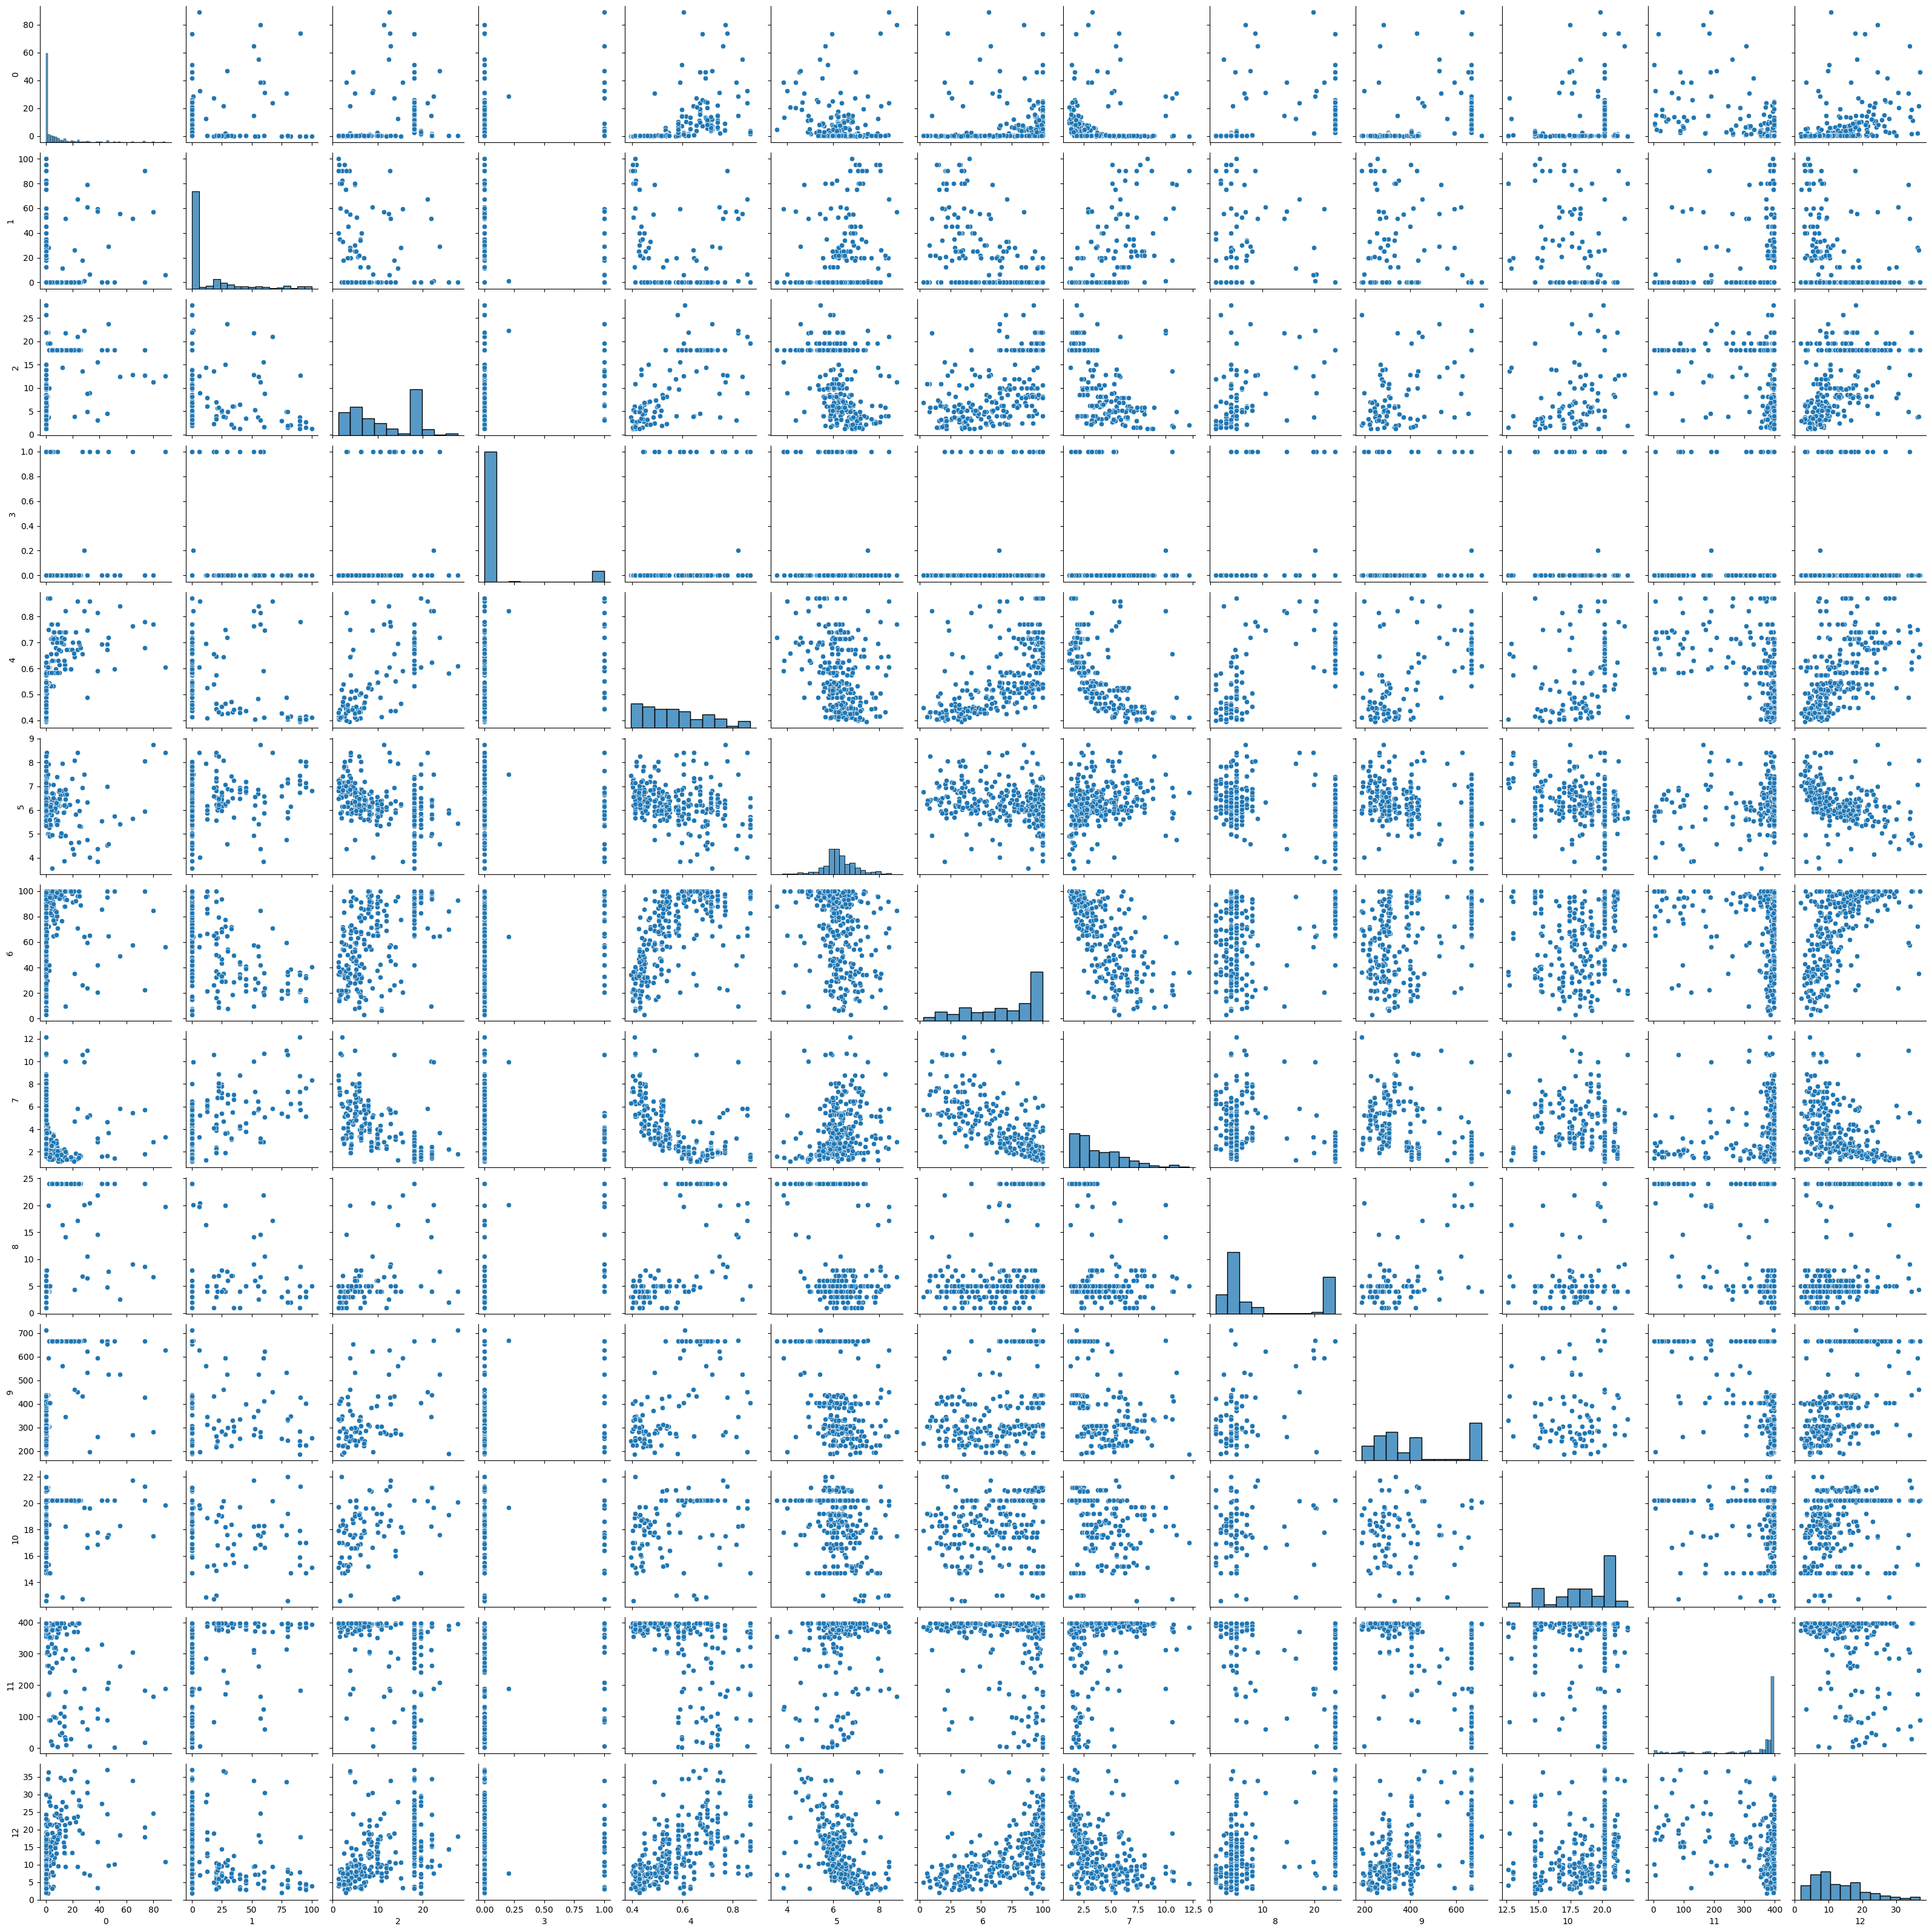

In [29]:
sns.pairplot(X_train)